In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

from importlib import reload
import src.data
import cascade_failure.simple_cascade
import src.visualization
import src.atack
reload(cascade_failure.simple_cascade)
reload(src.data)
reload(src.visualization)
reload(src.atack)

from src.data import load_data_with_attributes
from src.visualization import draw_graph_after_failure, draw_graph_with_node_highlighted
from cascade_failure.simple_cascade import cascade_failure_equal_load_distribution, cascade_failure_proportional_load_distribution
from src.atack import random_node_attack, high_degree_node_attack, high_betweenness_node_attack, high_load_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack

In [ ]:
G = load_data_with_attributes()

Graph loaded: 4941 nodes, 6594 edges


In [47]:
attacked_nodes = high_load_capacity_ratio_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
#list(G_after_failure.nodes(data=True))


In [61]:
def comm_detection(G, attack_type):
    attacked_nodes = attack_type(G, number_of_nodes=50)
    G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)

    G_after_failure = G_after_failure.subgraph( [n for n, data in G_after_failure.nodes(data=True) if data["failed"] == False] ).copy()
    communities=list(greedy_modularity_communities(G_after_failure))

    for i,comm in enumerate(communities):
        for node in comm:
            G_after_failure.nodes[node]['community'] = i

    #pos={n: (G_after_failure.nodes[n]['x'], G_after_failure.nodes[n]['y']) for n in G_after_failure.nodes if 'x' in G_after_failure.nodes[n] and 'y' in G_after_failure.nodes[n]}

    num_comms = len(communities)
    colours = sns.color_palette("tab20b", len(communities)) + sns.color_palette("tab20c", len(communities))
    colours = colours[:len(communities)]

    plt.figure(figsize=(10,8))
    plt.axis('off')

    pos = {n: tuple(G_after_failure.nodes[n]['pos']) for n in G_after_failure.nodes}

    for i, comm in enumerate(communities):
        nx.draw_networkx_nodes(
            G_after_failure,
            pos,
            nodelist=list(comm),
            node_size=3,
            node_color=[colours[i]],
            label=f"Community {i+1}"
        )

    nx.draw_networkx_edges(G_after_failure, pos, alpha= 0.3, width= 0.5)

    plt.legend(scatterpoints=1, fontsize=8, ncol=3, bbox_to_anchor=(1.02, 1.0))
    plt.title(f'Communities in western US power grid network', fontsize=12)
    plt.show()


Graph loaded: 4941 nodes, 6594 edges


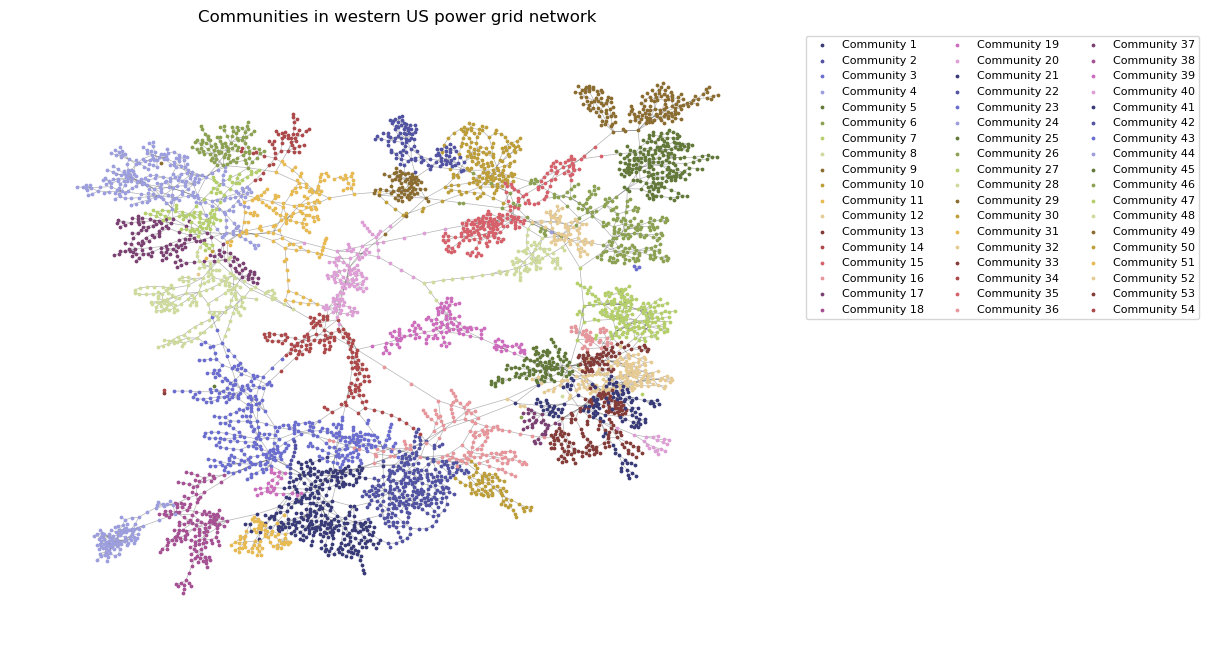

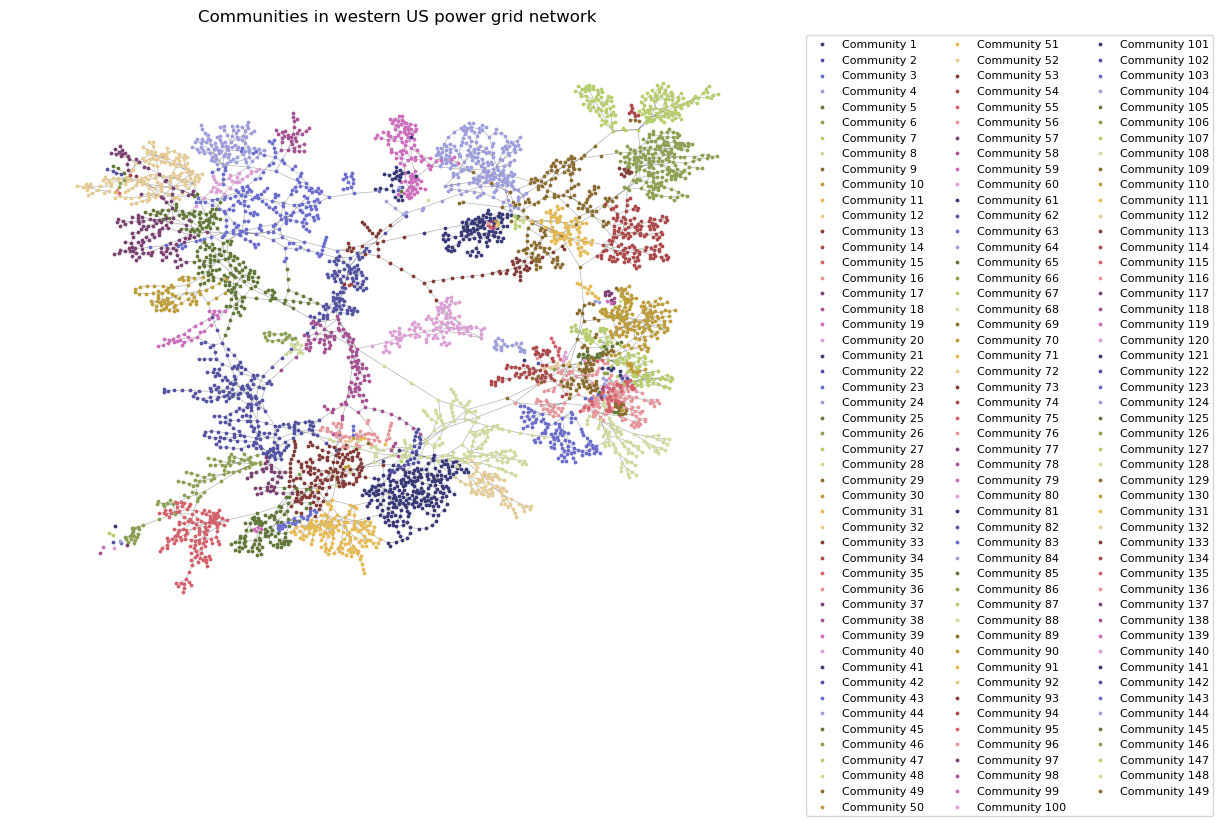

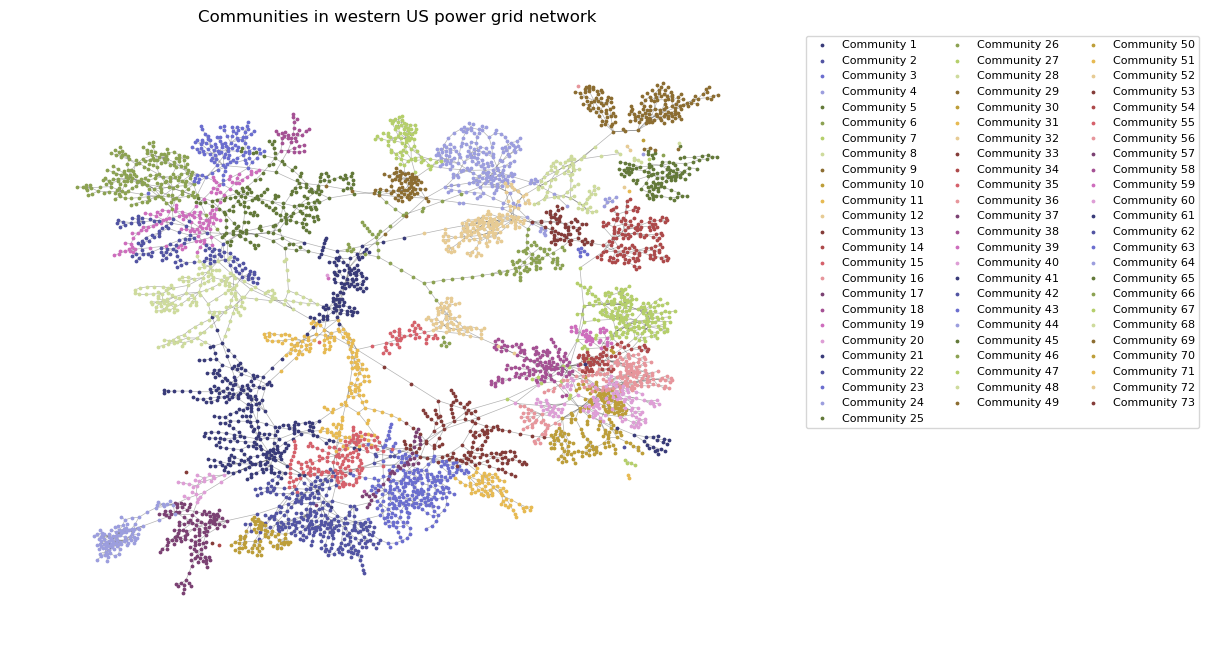

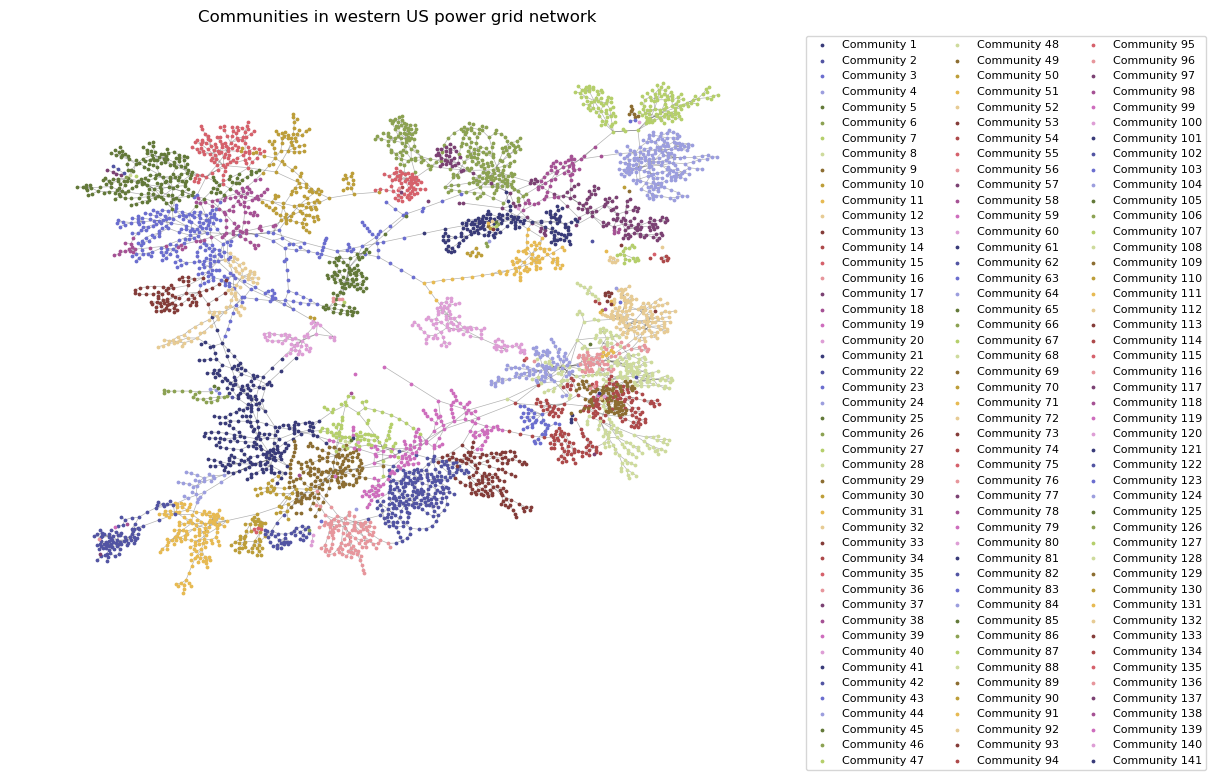

In [62]:
G = load_data_with_attributes()
attack_types = [random_node_attack, high_degree_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack]
for atype in attack_types:
    comm_detection(G,atype)